In [54]:
#importing essential packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [52]:
#Loading of the data
data = pd.read_csv('cyberbullying_tweets.csv')
display(data.head())
print(data.shape)

# Specify the target classes
classes = ["not_cyberbullying", "gender","religion","other_cyberbullying","age","ethnicity"]

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


(47692, 2)


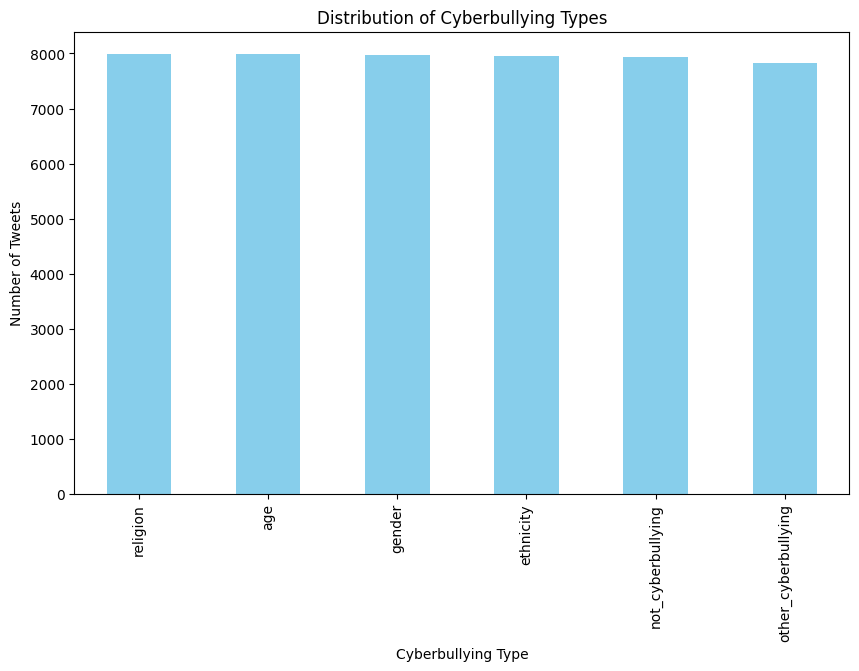

In [7]:
#Data Analysis

plt.figure(figsize=(10, 6))
data['cyberbullying_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Number of Tweets')
plt.show()

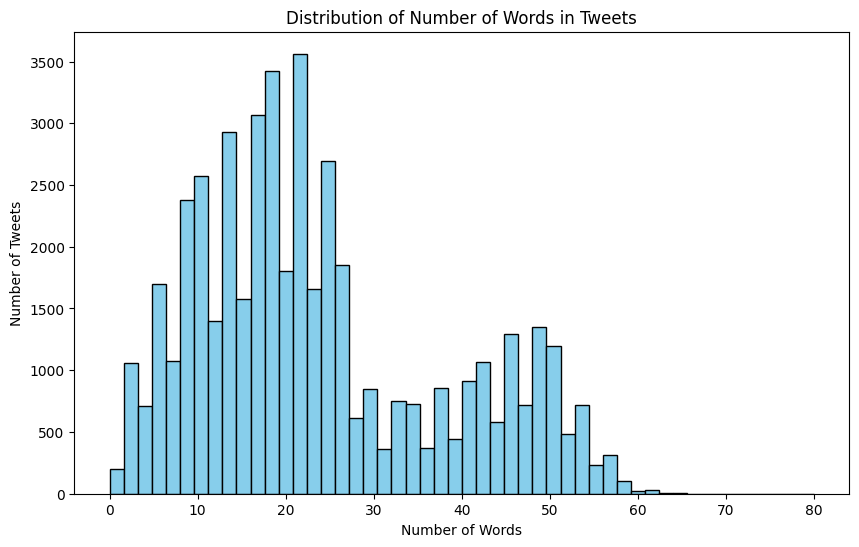

In [8]:
#Data Analysis

data['word_count'] = data['tweet_text'].str.split().str.len()
plt.figure(figsize=(10, 6))
plt.hist(data['word_count'], bins=50, color='skyblue', edgecolor='black',range=[0,80])
plt.title('Distribution of Number of Words in Tweets')
plt.xlabel('Number of Words')
plt.ylabel('Number of Tweets')
plt.show()

In [53]:
# Split the data into training and testing sets

X = data['tweet_text']
y = data['cyberbullying_type']
labels = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying', 'age', 'ethnicity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
#Data Preprocessing

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [16]:
# Initialize classifiers

naive_bayes = MultinomialNB()
logistic_regression = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=42)

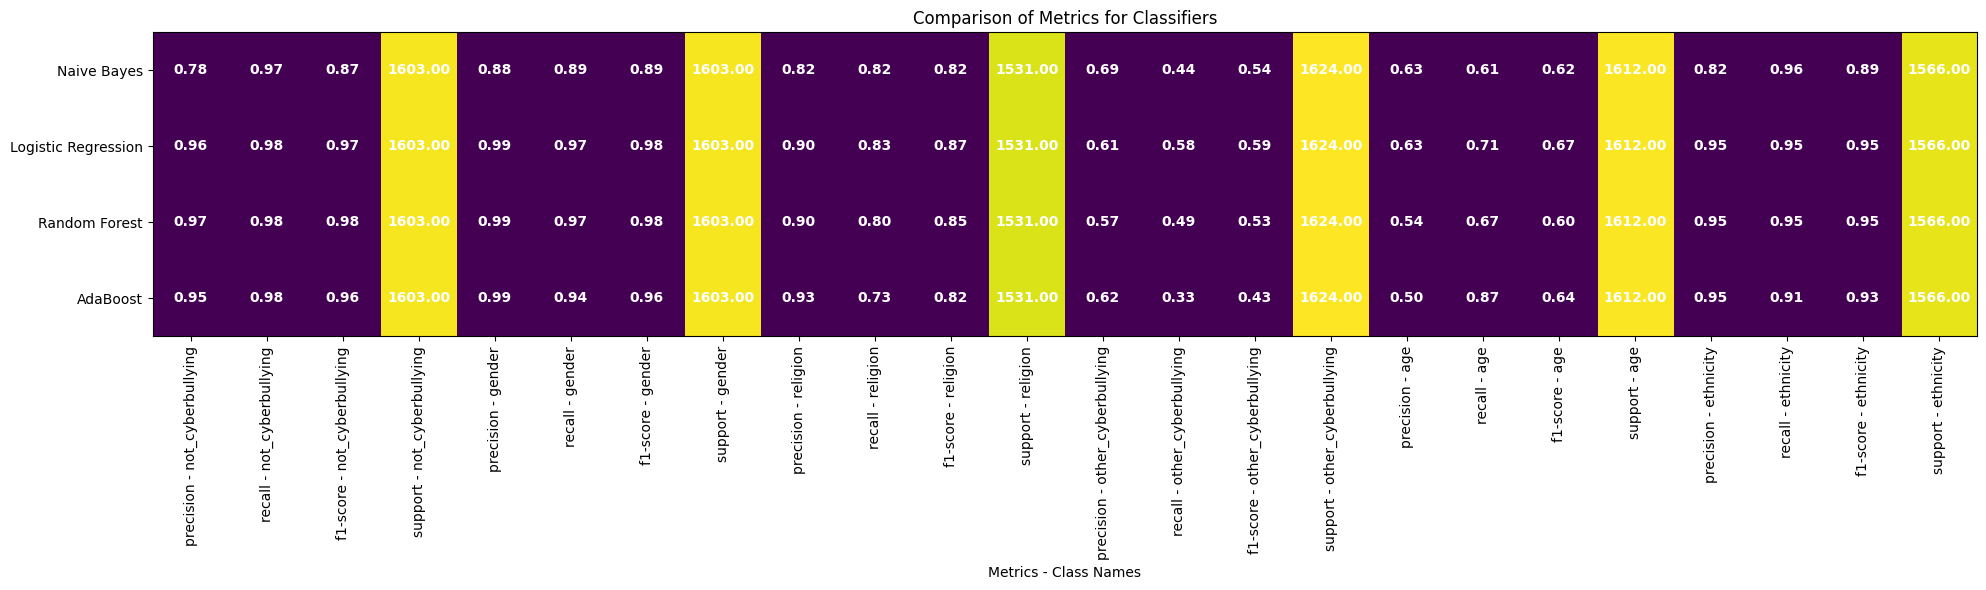

In [46]:
# Train and evaluate each classifier
classifiers = [('Naive Bayes', naive_bayes), ('Logistic Regression', logistic_regression),
               ('Random Forest', random_forest), ('AdaBoost', adaboost)]

# Get the unique class names
class_names = ['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying', 'age', 'ethnicity']

# Define the metrics to visualize
metrics = ['precision', 'recall', 'f1-score', 'support']

# Initialize an empty dictionary to store the classification reports for all classifiers
classification_reports = {}

for name, classifier in classifiers:
    classifier.fit(X_train_tfidf, y_train)
    y_pred = classifier.predict(X_test_tfidf)

    report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    classification_reports[name] = report

# Create a 2D numpy array to store the metrics for each class and classifier
report_data = np.zeros((len(classifiers), len(class_names) * len(metrics)))

for i, (name, _) in enumerate(classifiers):
    for j, class_name in enumerate(class_names):
        for k, metric in enumerate(metrics):
            report_data[i, j * len(metrics) + k] = classification_reports[name][class_name][metric]

# Create a single heatmap
fig, ax = plt.subplots(figsize=(50, 6))
im = ax.imshow(report_data, cmap='viridis')

# Set axis labels and ticks
ax.set_xticks(np.arange(len(class_names) * len(metrics)))
ax.set_yticks(np.arange(len(classifiers)))
ax.set_xticklabels([f'{metric} - {class_name}' for class_name in class_names for metric in metrics], rotation=90)
ax.set_yticklabels([name for name, _ in classifiers])
ax.set_xlabel('Metrics - Class Names')

# Display the metric values in the heatmap
for i in range(len(classifiers)):
    for j in range(len(class_names) * len(metrics)):
        value = report_data[i, j]
        if metrics[j % len(metrics)] == 'support':
            value = int(value)
        ax.text(j, i, f'{value:.2f}', ha='center', va='center', color='w', fontweight='bold')

ax.set_title('Comparison of Metrics for Classifiers')
fig.tight_layout()

plt.show()